The International Development Association (IDA) credits are public and publicly guaranteed debt extended by the World Bank Group. IDA provides development credits, grants and guarantees to its recipient member countries to help meet their development needs. Credits from IDA are at concessional rates. Data are in U.S. dollars calculated using historical rates. This dataset contains historical snapshots of the IDA Statement of Credits and Grants including the latest available snapshot. The World Bank complies with all sanctions applicable to World Bank transactions.


In [1]:
!pip install sqlalchemy

Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://finances.worldbank.org/resource/tdwh-3krx.csv')

In [ ]:
#df.head()

The main question here is which country has a probability greater than 0.1 of being in debt with IDA.

Missing data

In [4]:
missing_percentages = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing data for each column:")
print(missing_percentages)


Percentage of missing data for each column:
end_of_period                    0.0
credit_number                    0.0
region                           0.0
country_code                     0.0
country                          0.0
borrower                         0.0
credit_status                    0.0
service_charge_rate              0.0
currency_of_commitment           0.0
project_id                       0.0
project_name                     0.0
original_principal_amount        0.0
cancelled_amount                 0.0
undisbursed_amount               0.0
disbursed_amount                 0.0
repaid_to_ida                    0.0
due_to_ida                       0.0
exchange_adjustment              0.0
borrower_s_obligation            0.0
sold_3rd_party                   0.0
repaid_3rd_party                 0.0
due_3rd_party                    0.0
credits_held                     0.0
first_repayment_date             0.0
last_repayment_date              0.0
agreement_signing_date         

In [5]:
#Converting date columns to datetime
date_columns = ['end_of_period', 'first_repayment_date', 'last_repayment_date',
                 'agreement_signing_date', 'board_approval_date', 'effective_date_most_recent_',
                 'closed_date_most_recent_', 'last_disbursement_date']
for column in date_columns:
    df[column] =pd.to_datetime(df[column])

Categorical vs numerical data

In [ ]:
print(df.dtypes)


end_of_period                  datetime64[ns]
credit_number                          object
region                                 object
country_code                           object
country                                object
borrower                               object
credit_status                          object
service_charge_rate                   float64
currency_of_commitment                 object
project_id                             object
project_name                           object
original_principal_amount             float64
cancelled_amount                      float64
undisbursed_amount                    float64
disbursed_amount                      float64
repaid_to_ida                         float64
due_to_ida                            float64
exchange_adjustment                   float64
borrower_s_obligation                 float64
sold_3rd_party                        float64
repaid_3rd_party                      float64
due_3rd_party                     

Dropping columns that provides no useful information

In [6]:
df.describe()

,end_of_period,service_charge_rate,original_principal_amount,cancelled_amount,undisbursed_amount,disbursed_amount,repaid_to_ida,due_to_ida,exchange_adjustment,borrower_s_obligation,...,repaid_3rd_party,due_3rd_party,credits_held,first_repayment_date,last_repayment_date,agreement_signing_date,board_approval_date,effective_date_most_recent_,closed_date_most_recent_,last_disbursement_date
count,1000,1000.00,1.000000e+03,1.000000e+03,1000.0,1.000000e+03,1.000000e+03,1.000000e+03,1000.0,1.000000e+03,...,1000.0,1000.0,1.000000e+03,1000,1000,1000,1000,1000,1000,0
mean,2017-07-17 10:53:45.599999744,0.75,2.295905e+07,3.812300e+05,0.0,2.260075e+07,2.172142e+07,8.793296e+05,0.0,8.793296e+05,...,0.0,0.0,8.793296e+05,1971-11-01 08:55:40.800000,2011-05-03 01:26:24,1961-07-10 18:25:55.200000,1961-07-07 21:30:14.400000,1961-10-17 03:04:19.200000,1968-04-20 19:35:02.400000,NaT
min,2011-04-30 00:00:00,0.75,2.200000e+06,0.000000e+00,0.0,2.447321e+06,2.410509e+06,0.000000e+00,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,1971-07-15 00:00:00,2011-01-15 00:00:00,1961-05-12 00:00:00,1961-05-11 00:00:00,1961-06-29 00:00:00,1965-06-30 00:00:00,NaT
25%,2014-03-31 00:00:00,0.75,9.000000e+06,2.244580e+03,0.0,8.427974e+06,7.502114e+06,0.000000e+00,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,1971-08-15 00:00:00,2011-02-15 00:00:00,1961-06-14 00:00:00,1961-06-13 00:00:00,1961-08-25 00:00:00,1967-06-30 00:00:00,NaT
50%,2017-04-30 00:00:00,0.75,1.550970e+07,5.300000e+05,0.0,1.487650e+07,1.487650e+07,0.000000e+00,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,1971-12-01 00:00:00,2011-06-01 00:00:00,1961-06-28 00:00:00,1961-06-27 00:00:00,1961-11-25 00:00:00,1967-07-31 00:00:00,NaT
75%,2020-10-31 00:00:00,0.75,2.348100e+07,5.720260e+05,0.0,2.348100e+07,2.348100e+07,0.000000e+00,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,1971-12-01 00:00:00,2011-06-01 00:00:00,1961-08-28 00:00:00,1961-08-15 00:00:00,1961-11-27 00:00:00,1968-12-31 00:00:00,NaT
max,2024-03-31 00:00:00,0.75,7.211271e+07,1.668669e+06,0.0,7.158271e+07,7.158271e+07,7.374385e+06,0.0,7.374385e+06,...,0.0,0.0,7.374385e+06,1972-03-15 00:00:00,2011-09-15 00:00:00,1961-08-30 00:00:00,1961-08-29 00:00:00,1961-12-21 00:00:00,1971-12-31 00:00:00,NaT
std,NaN,0.00,2.241931e+07,4.365159e+05,0.0,2.244518e+07,2.287082e+07,2.388386e+06,0.0,2.388386e+06,...,0.0,0.0,2.388386e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(df['undisbursed_amount'].isnull()),len(df['exchange_adjustment'].isnull())

(1000, 1000)

In [8]:
#only one entry for this variable then, we will drop it
df['currency_of_commitment'].unique()

array(['USD'], dtype=object)

In [9]:
df.drop(columns=['last_disbursement_date','undisbursed_amount','exchange_adjustment','sold_3rd_party','repaid_3rd_party','due_3rd_party','currency_of_commitment' ], inplace=True)

Some meaningfull plots

In [20]:
year = (pd.to_datetime(df['end_of_period'])).dt.year

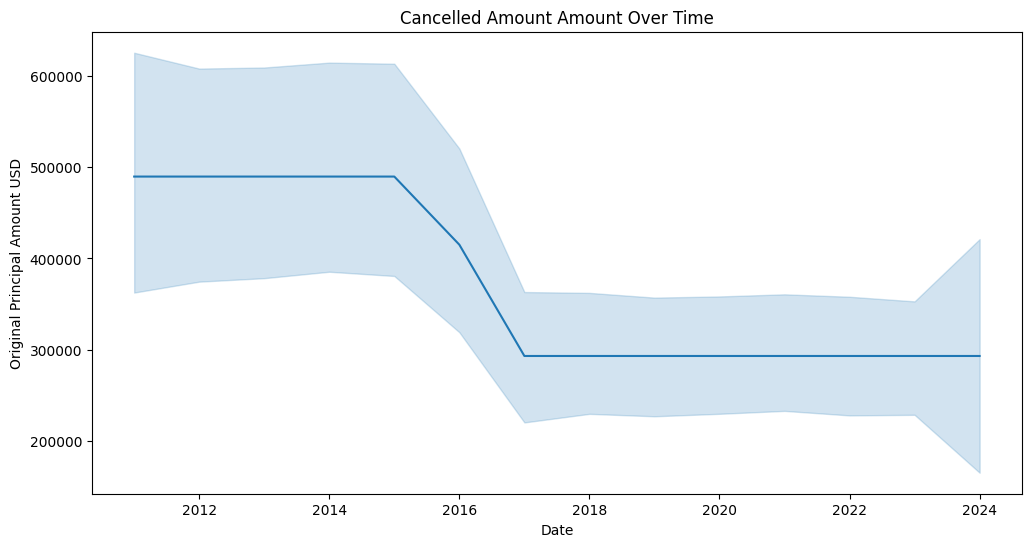

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=year, y='cancelled_amount')
plt.title('Cancelled Amount Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Original Principal Amount USD')
plt.show()

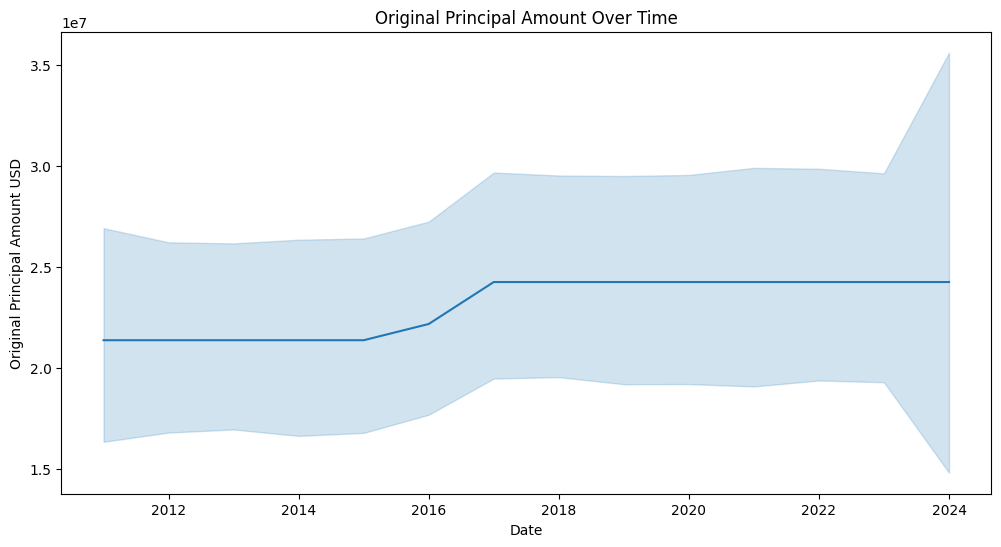

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=year, y='original_principal_amount')
plt.title('Original Principal Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Original Principal Amount USD')
plt.show()


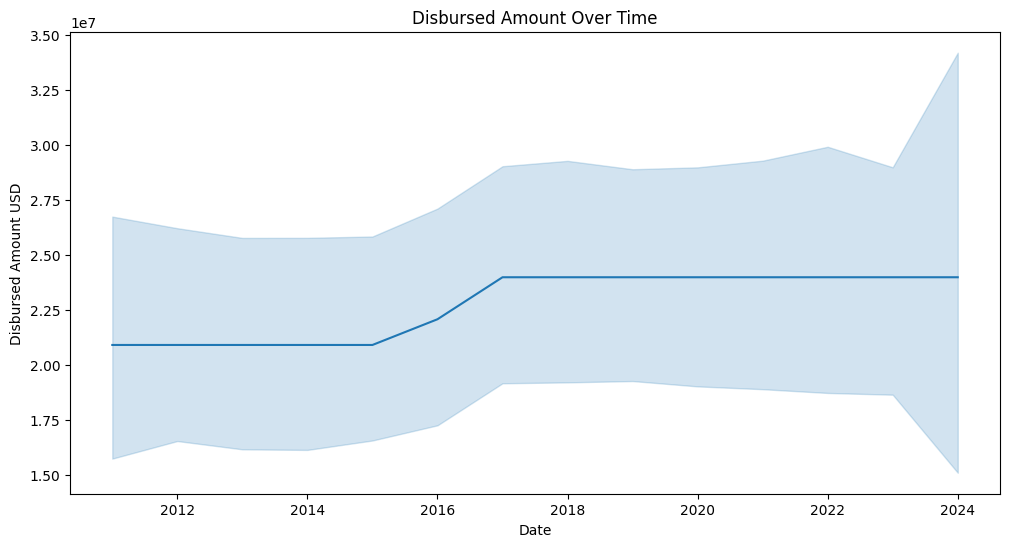

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=year, y='disbursed_amount')
plt.title('Disbursed Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Disbursed Amount USD')
plt.show()


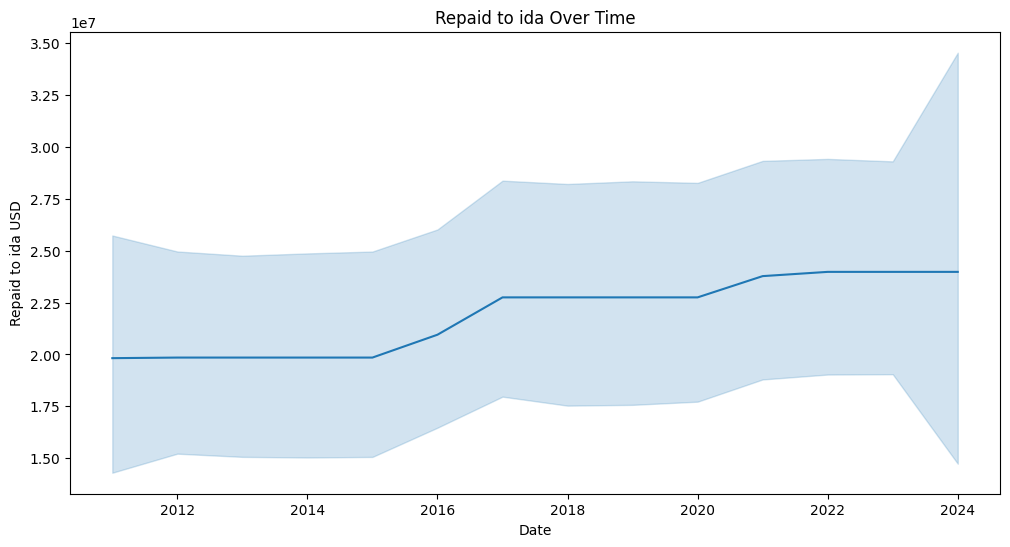

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=year, y='repaid_to_ida')
plt.title('Repaid to ida Over Time')
plt.xlabel('Date')
plt.ylabel('Repaid to ida USD')
plt.show()


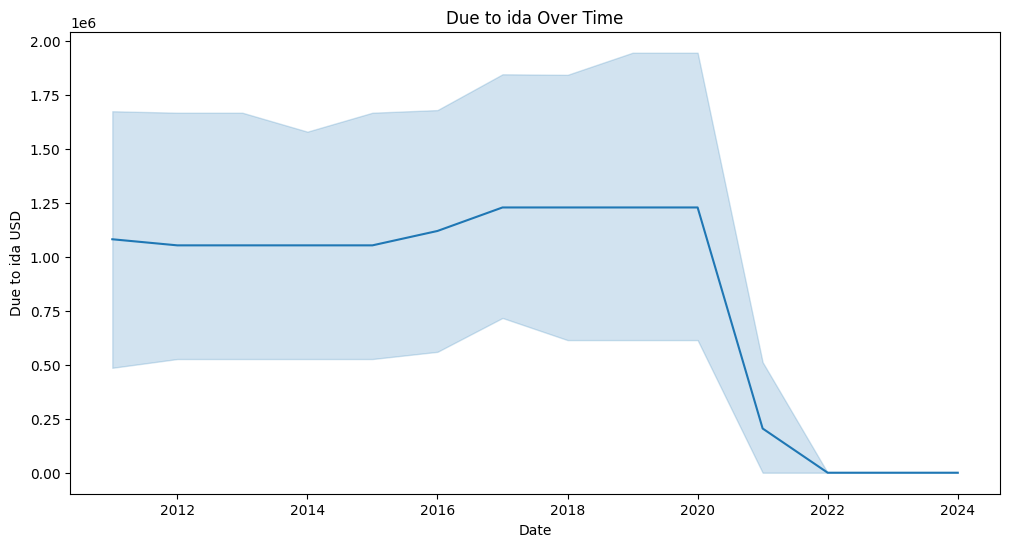

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=year, y='due_to_ida')
plt.title('Due to ida Over Time')
plt.xlabel('Date')
plt.ylabel('Due to ida USD')
plt.show()

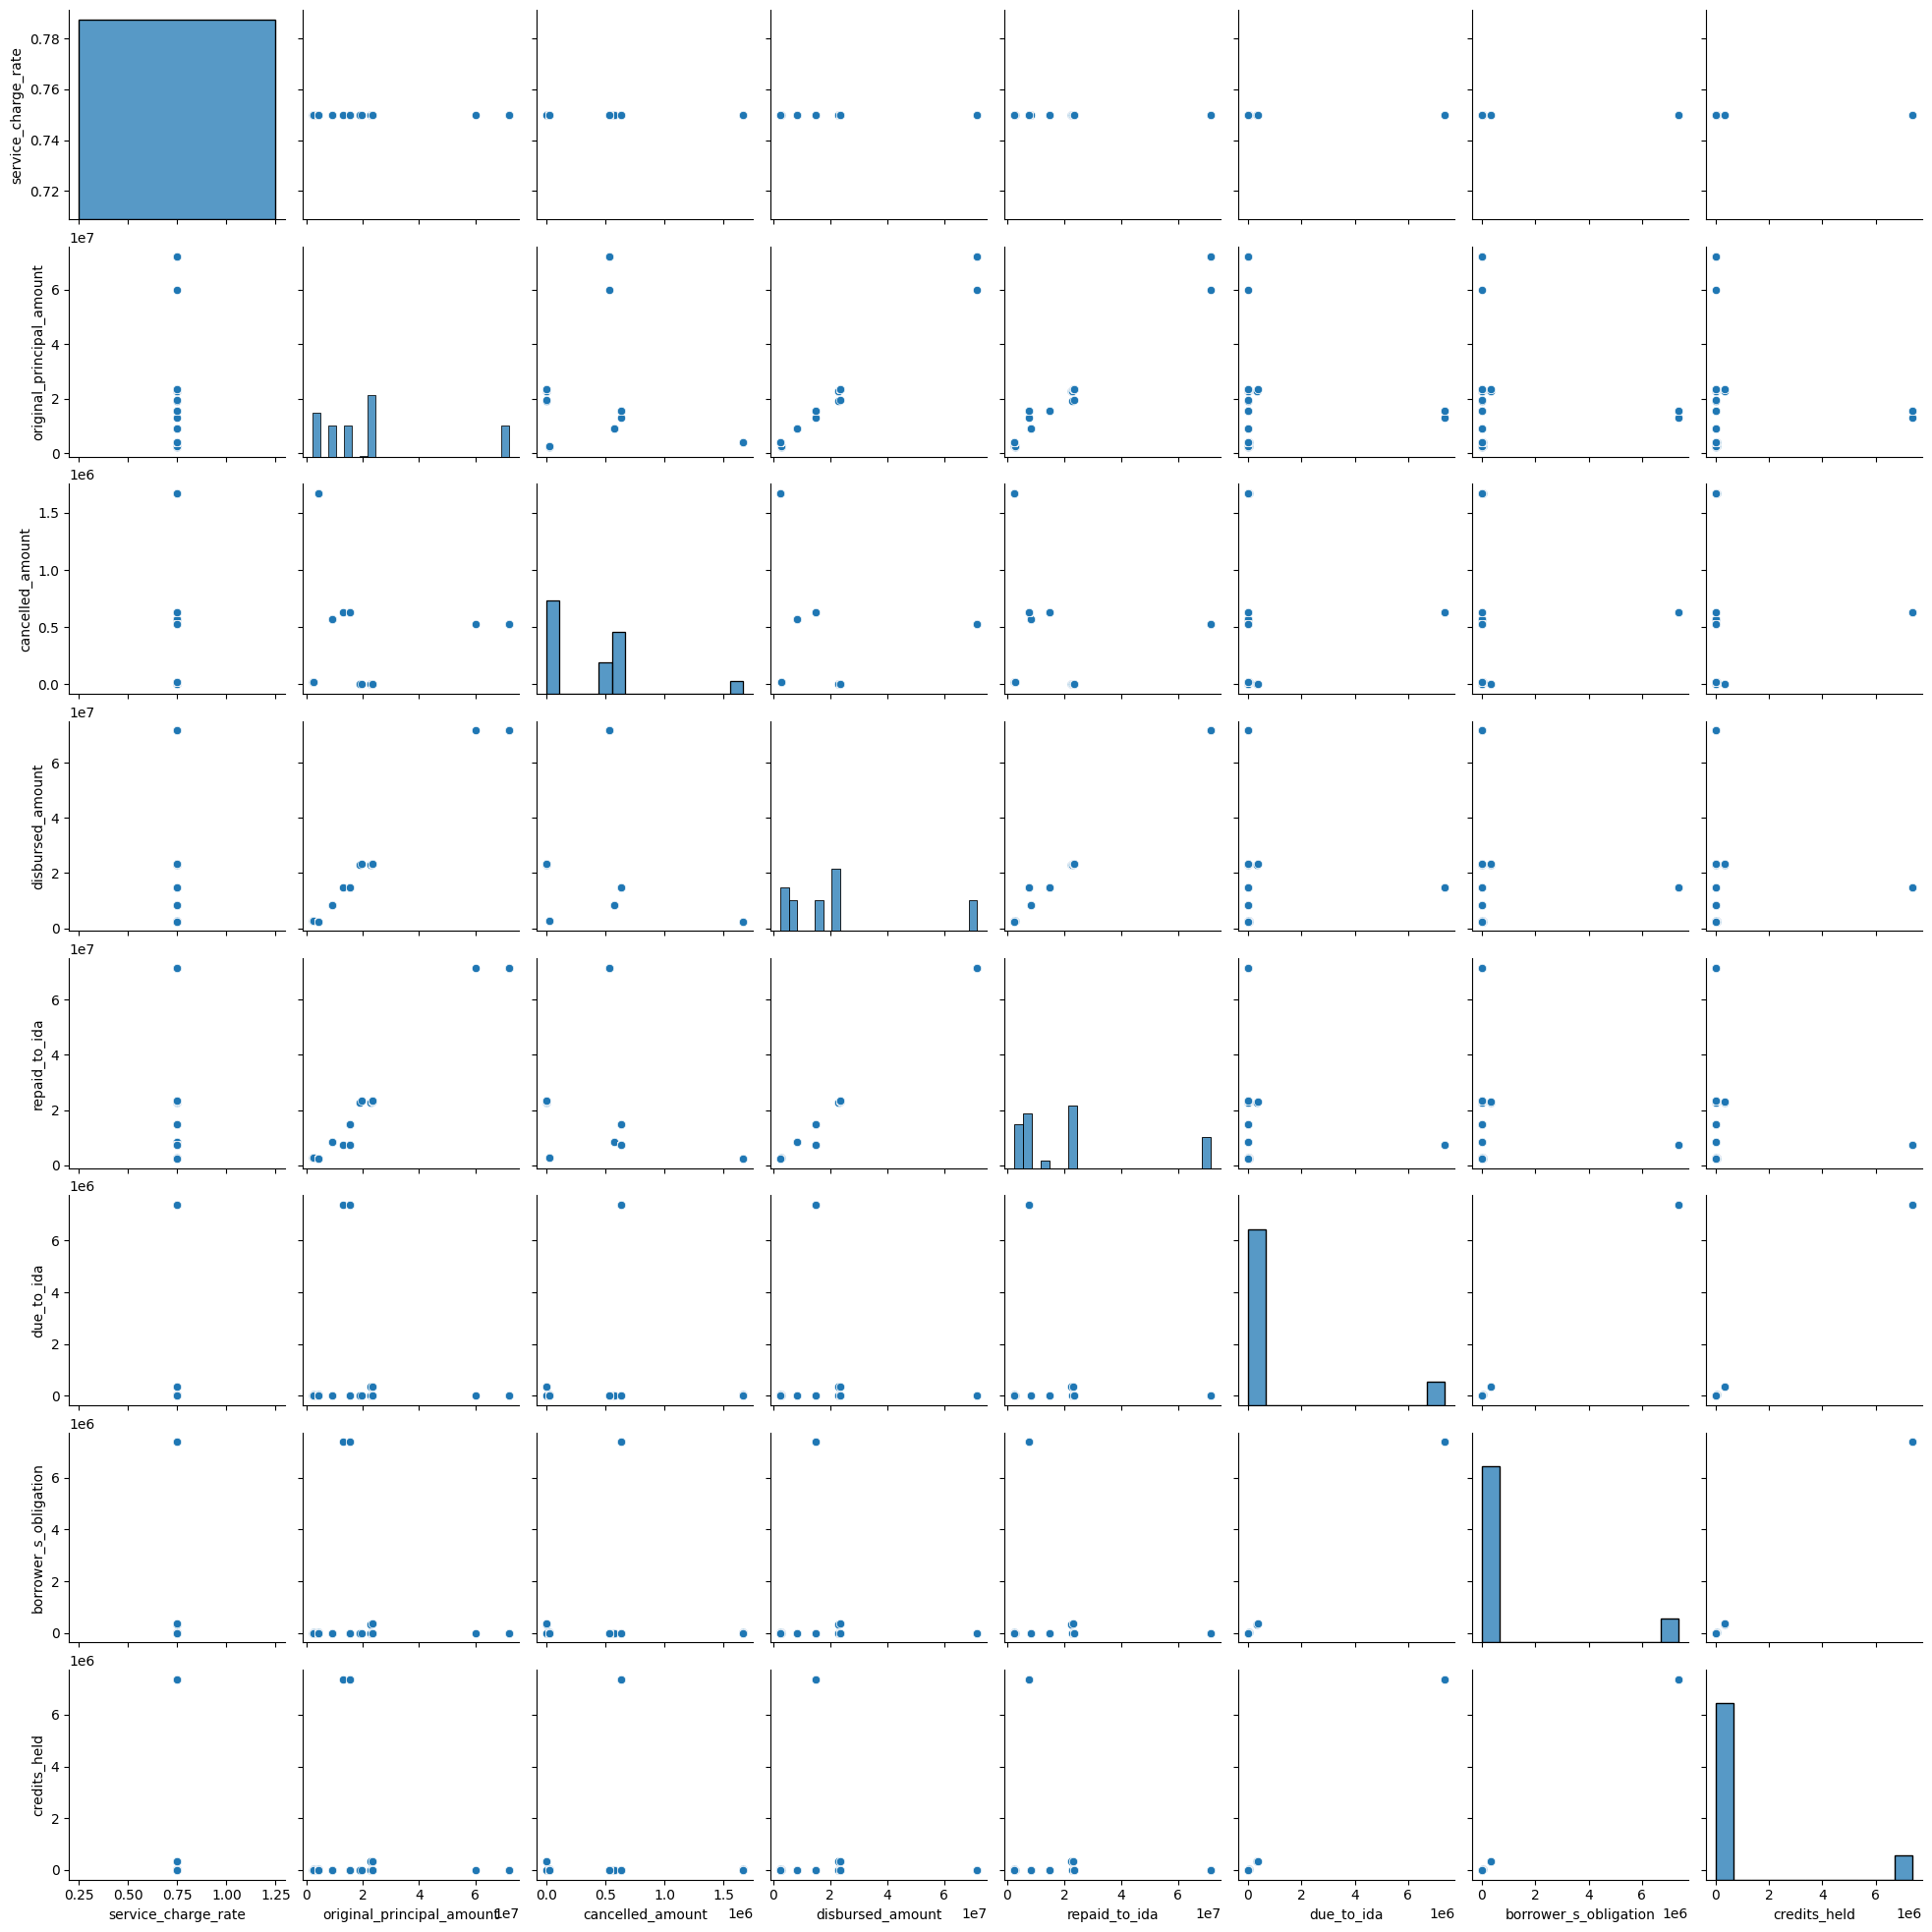

In [ ]:
sns.pairplot(df)
plt.show()


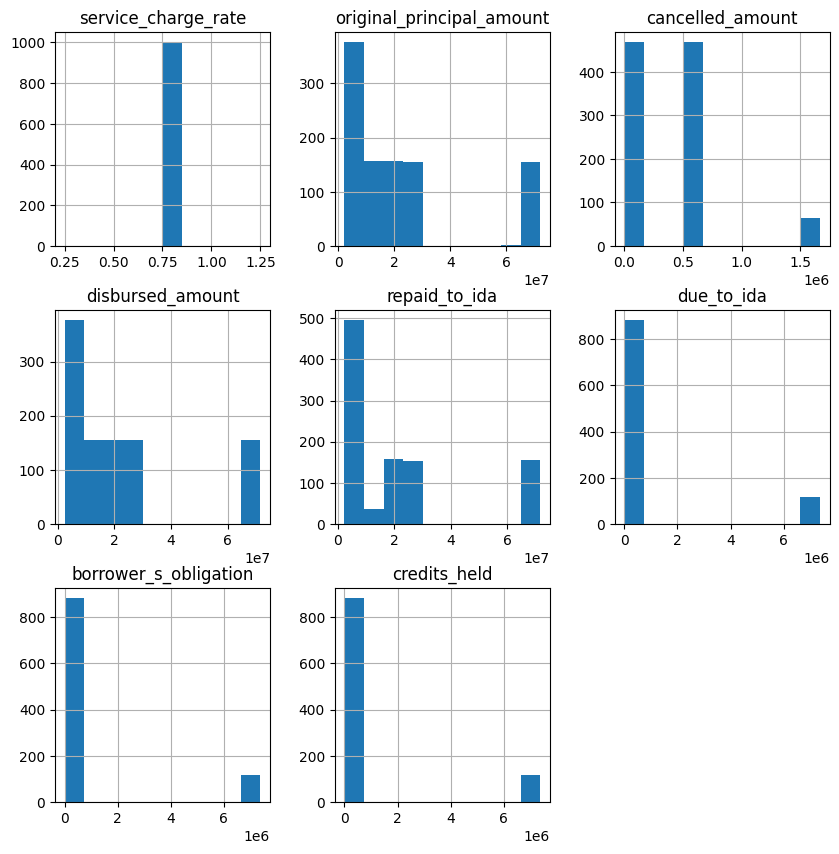

In [26]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[num_columns].hist(figsize=(10, 10))
plt.show()

#corr_matrix = df[num_columns].corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix of Financial Metrics')
#plt.show()


In [ ]:
import scipy.stats as stats

# ANOVA test across credit statuses for 'disbursed_amount'
f_val, p_val = stats.f_oneway(df[df['credit_status'] == 'Fully Repaid']['disbursed_amount'],
                              df[df['credit_status'] == 'Repaid']['disbursed_amount'],
                              df[df['credit_status'] == 'Repaying']['disbursed_amount'],
                              df[df['credit_status'] == 'Disbursed']['disbursed_amount'])

print(f"F-Statistic: {f_val}, P-Value: {p_val}")


F-Statistic: 10.457070938484215, P-Value: 8.910830261508064e-07


In [ ]:
# ANOVA test across credit statuses for 'original_principal_amount'
f_val, p_val = stats.f_oneway(df[df['credit_status'] == 'Fully Repaid']['original_principal_amount'],
                              df[df['credit_status'] == 'Repaid']['original_principal_amount'],
                              df[df['credit_status'] == 'Repaying']['original_principal_amount'],
                              df[df['credit_status'] == 'Disbursed']['original_principal_amount'])

print(f"F-Statistic: {f_val}, P-Value: {p_val}")


F-Statistic: 9.751829239401049, P-Value: 2.409741981231476e-06


Predictive modeling - Debt servicing ratio

In [27]:
df['debt_servicing_ratio'] = df['repaid_to_ida'] / df['disbursed_amount']


In [28]:
df['past_due'] = (df['due_to_ida'] > 0).astype(int)


In [29]:
df['non_repayment'] = (df['due_to_ida'] / df['disbursed_amount'] > 0.1).astype(int)


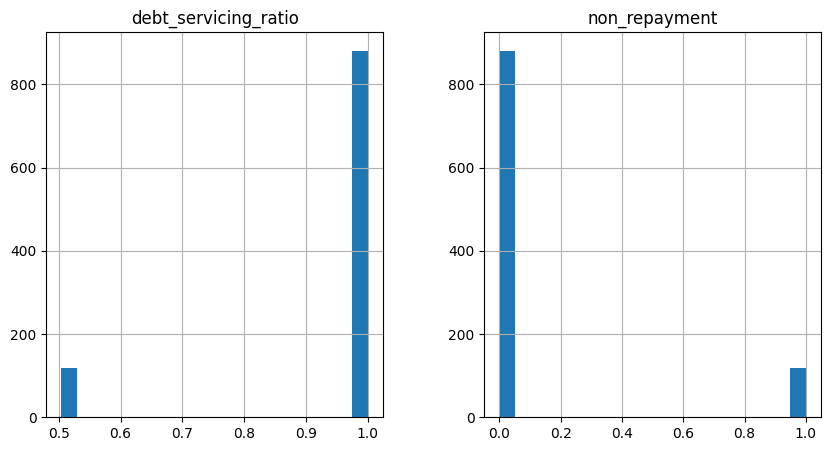

In [30]:
# Histograms for continuous features
df[['debt_servicing_ratio', 'non_repayment']].hist(bins=20, figsize=(10, 5))
plt.show()




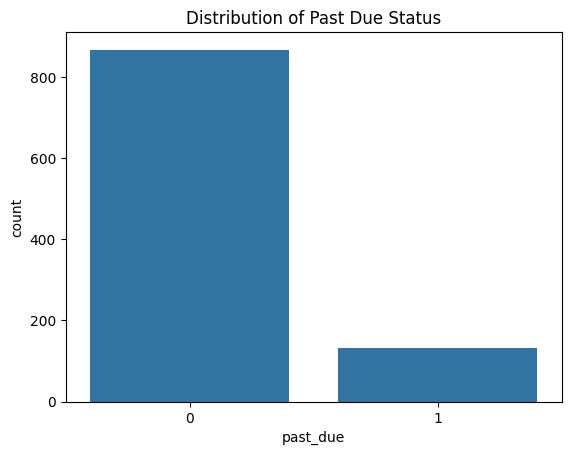

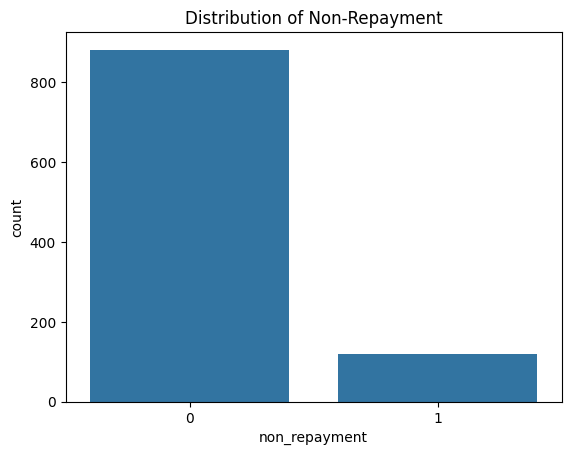

In [ ]:
# Bar chart for 'past_due' status
sns.countplot(x='past_due', data=df)
plt.title('Distribution of Past Due Status')
plt.show()

# Bar chart for 'non_repayment'
sns.countplot(x='non_repayment', data=df)
plt.title('Distribution of Non-Repayment')
plt.show()


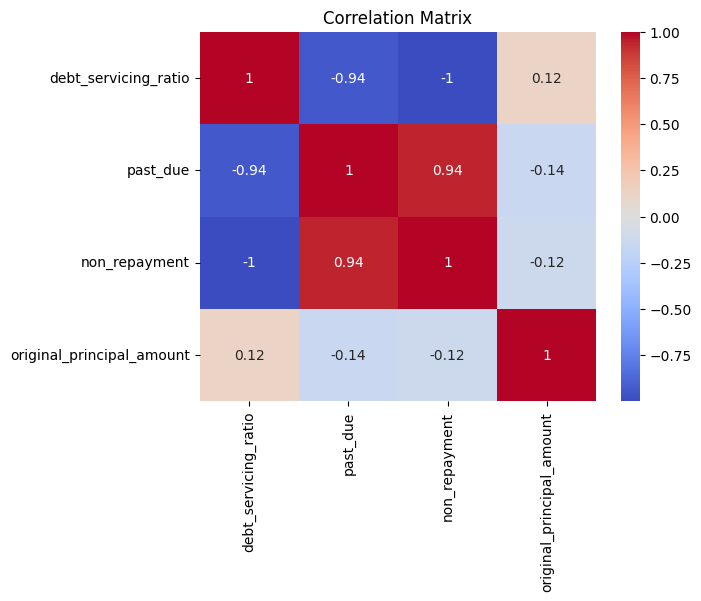

In [31]:
correlation_matrix = df[['debt_servicing_ratio', 'past_due', 'non_repayment', 'original_principal_amount']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [38]:
df['non_repayment'].shape

(1000,)

In [41]:
scaler = StandardScaler()
X = scaler.fit(df[['debt_servicing_ratio', 'past_due', 'non_repayment', 'original_principal_amount', 'disbursed_amount', 'due_to_ida']])
y = scaler.fit_transform(df[['non_repayment']])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


X = df[['debt_servicing_ratio', 'past_due', 'non_repayment', 'original_principal_amount', 'disbursed_amount', 'due_to_ida']]
y = df['non_repayment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[177   0]
 [  0  23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00        23

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [44]:
importance = model.coef_[0]
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))


Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00001
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00003


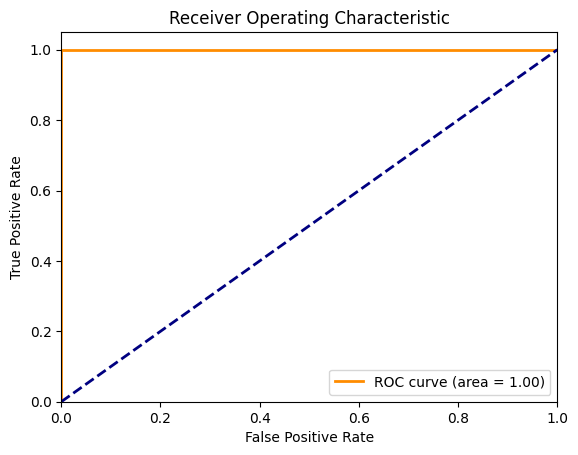

In [45]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [56]:
df['default_probability'] = model.predict_proba(X)[:, 1]
high_risk_countries = df[df['default_probability'] > 0.1]
high_risk_countries.reset_index(inplace=True)

    end_of_period country  default_probability
0      2011-04-30   Sudan                  1.0
1      2011-05-31   Sudan                  1.0
2      2011-06-30   Sudan                  1.0
3      2011-07-31   Sudan                  1.0
4      2011-08-31   Sudan                  1.0
..            ...     ...                  ...
114    2020-10-31   Sudan                  1.0
115    2020-11-30   Sudan                  1.0
116    2020-12-31   Sudan                  1.0
117    2021-01-31   Sudan                  1.0
118    2021-02-28   Sudan                  1.0

[119 rows x 3 columns]


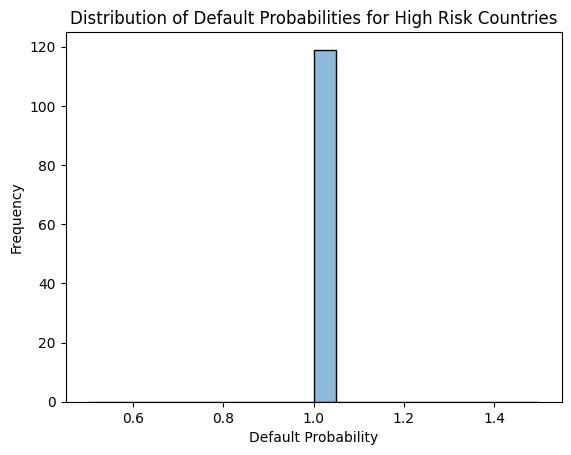

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(high_risk_countries['default_probability'], bins=20, kde=True)
plt.title('Distribution of Default Probabilities for High Risk Countries')
plt.xlabel('Default Probability')
plt.ylabel('Frequency')
plt.show()


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", scores)


Cross-validated AUC scores: [1. 1. 1. 1. 1.]


In [57]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [66]:
y_pred = forest_model.predict(X_test)

df['default_probability'] = forest_model.predict_proba(X)[:, 1]
high_risk_countries = df[df['default_probability'] > 0.1]


In [67]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(high_risk_countries[['country', 'default_probability']])

[[177   0]
 [  0  23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00        23

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

    country  default_probability
156   Sudan                  1.0
157   Sudan                  1.0
158   Sudan                  1.0
159   Sudan                  1.0
160   Sudan                  1.0
..      ...                  ...
270   Sudan                  1.0
271   Sudan                  1.0
272   Sudan                  1.0
273   Sudan                  1.0
274   Sudan                  1.0

[119 rows x 2 columns]


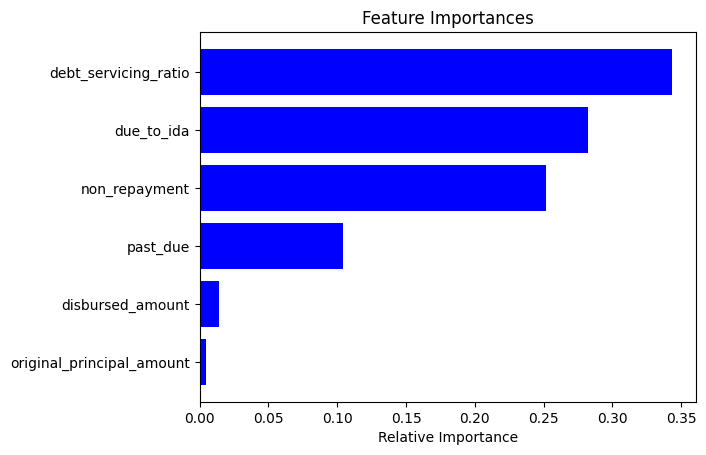

In [68]:
importances = forest_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Creating a Database

In [ ]:
from sqlalchemy import create_engine, Column, Integer, String, Float, DateTime, Boolean
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

Base = declarative_base()

class HighRiskCountry(Base):
    __tablename__ = 'high_risk_countries'
    id = Column(Integer, primary_key=True)
    end_of_period = Column(DateTime)
    credit_number = Column(String)
    region = Column(String)
    country_code = Column(String)
    country = Column(String)
    borrower = Column(String)
    credit_status = Column(String)
    service_charge_rate = Column(Float)
    project_id = Column(String)
    project_name = Column(String)
    original_principal_amount = Column(Float)
    cancelled_amount = Column(Float)
    disbursed_amount = Column(Float)
    repaid_to_ida = Column(Float)
    due_to_ida = Column(Float)
    borrower_s_obligation = Column(Float)
    credits_held = Column(Float)
    first_repayment_date = Column(DateTime)
    last_repayment_date = Column(DateTime)
    agreement_signing_date = Column(DateTime)
    board_approval_date = Column(DateTime)
    effective_date_most_recent_ = Column(DateTime, name='effective_date_most_recent_')
    closed_date_most_recent = Column(DateTime,name='closed_date_most_recent_')
    debt_servicing_ratio = Column(Float)
    past_due = Column(Integer)
    non_repayment = Column(Integer)
    prediction = Column(Integer)
    default_probability = Column(Float)
    high_risk = Column(Integer)


<ipython-input-70-f225a2880f5c>:5: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [ ]:
engine = create_engine('sqlite:///high_risk_countries.db')
Base.metadata.drop_all(engine)
Base.metadata.create_all(engine)

In [ ]:
Session = sessionmaker(bind=engine)
session = Session()

high_risk_countries.to_sql('high_risk_countries', con=engine, if_exists='append', index=False, method='multi')


1000

In [ ]:
from sqlalchemy import create_engine, MetaData

engine = create_engine('sqlite:///high_risk_countries.db')
metadata = MetaData()
metadata.reflect(bind=engine)

for table in metadata.tables.values():
    print(table.name)
    for column in table.c:
        print("  ", column.name, column.type)


high_risk_countries
   id INTEGER
   end_of_period DATETIME
   credit_number VARCHAR
   region VARCHAR
   country_code VARCHAR
   country VARCHAR
   borrower VARCHAR
   credit_status VARCHAR
   service_charge_rate FLOAT
   project_id VARCHAR
   project_name VARCHAR
   original_principal_amount FLOAT
   cancelled_amount FLOAT
   disbursed_amount FLOAT
   repaid_to_ida FLOAT
   due_to_ida FLOAT
   borrower_s_obligation FLOAT
   credits_held FLOAT
   first_repayment_date DATETIME
   last_repayment_date DATETIME
   agreement_signing_date DATETIME
   board_approval_date DATETIME
   effective_date_most_recent_ DATETIME
   closed_date_most_recent_ DATETIME
   debt_servicing_ratio FLOAT
   past_due INTEGER
   non_repayment INTEGER
   prediction INTEGER
   default_probability FLOAT
   high_risk INTEGER


In [ ]:
Session = sessionmaker(bind=engine)
session = Session()

result = session.query(HighRiskCountry).limit(10).all()
for item in result:
    print(item.country, item.default_probability)

session.close()


Honduras 0.0004616436114940771
Honduras 0.0004616436114940771
Honduras 0.0004616436114940771
Honduras 0.0004616436114940771
Honduras 0.0004616436114940771
Honduras 0.0004616436114940771
Honduras 0.0004616436114940771
Honduras 0.0004616436114940771
Honduras 0.0004616436114940771
Honduras 0.0004616436114940771


Then we conclude that Sudan has a probability greater than 0.1 of being in debt with IDA in the next years.

In [73]:
high_risk_countries['country'].unique()

array(['Sudan'], dtype=object)